In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [12]:
data = pd.read_csv("clean17.csv")
data.head()

,543,"\n Dự án 108 Nguyễn Trãi, Đường Nguyễn Trãi, Phường Thượng Đình, Thanh Xuân, Hà Nội\n",5500000000,126,3,3.1,Công ty TNHH Một thành viên quản lý và phát triển nhà Hà Nội,"Gồm 33 căn liền kề, biệt thự và 1 tổ hợp văn phòng, chung cư",Unnamed: 8,Unnamed: 9
0,1678,"\n Dự án M5 Nguyễn Chí Thanh, Đường Ngu...",4000000000,149.0,3,2,Công ty TNHH Một thành viên quản lý và phát t...,"31 tầng nổi, 5 tầng hầm",NaN,NaN
1,2348,"\n M5 Nguyễn Chí Thanh, số 91, Đường Ng...",4500000000,149.0,3,3,Công ty TNHH Một thành viên quản lý và phát t...,"31 tầng nổi, 5 tầng hầm",NaN,NaN
2,3304,"\n M5 Nguyễn Chí Thanh, số 91, Đường Ng...",3700000000,133.0,3,2,Công ty TNHH Một thành viên quản lý và phát t...,"31 tầng nổi, 5 tầng hầm",NaN,NaN
3,5515,"\n Dự án 108 Nguyễn Trãi, Đường Nguyễn ...",3800000000,95.0,2,1,Công ty TNHH Một thành viên quản lý và phát t...,"Gồm 33 căn liền kề, biệt thự và 1 tổ hợp văn p...",NaN,NaN
4,6189,"\n Dự án M5 Nguyễn Chí Thanh, Đường Ngu...",4000000000,133.0,3,2,Công ty TNHH Một thành viên quản lý và phát t...,"31 tầng nổi, 5 tầng hầm",NaN,NaN


In [13]:
X_before = data.values

In [14]:
X = X_before[:,3:6]
y = X_before[:,2]

In [15]:
dict = {}
count = 0
for nhaDauTu in X_before[:,6]:
    dict[nhaDauTu]= count
    count+=1

In [16]:
for i in range(len(X_before[:,6])):
    for kiemTra in dict.keys():
        if kiemTra == X_before[i,6]:
            X_before[i,6] = dict[kiemTra]
print(X_before[:,6])

[5 5 5 ... 8040 8040 8040]


In [17]:
x_extend = X_before[:,6]
x_extend

array([5, 5, 5, ..., 8040, 8040, 8040], dtype=object)

In [18]:
X = np.column_stack((X, x_extend))

In [19]:
X = np.nan_to_num(X)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [22]:
from sklearn import linear_model
linear = linear_model.LinearRegression()

In [23]:
linear.fit(X_train,y_train)

LinearRegression()

In [24]:
linear.score(X_test,y_test)

0.4895929443106576

In [25]:
linear.coef_

array([ 5.26451662e+07, -4.19733686e+08,  3.13962294e+08,  7.59237406e+04])

In [26]:
y_pred = linear.predict(X_test)

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [28]:
df

,Actual,Predicted
0,2700000000,3.086381e+09
1,2600000000,2.567526e+09
2,1850000000,1.856897e+09
3,3000000000,3.236119e+09
4,2860000000,2.747925e+09
...,...,...
2408,2250000000,2.499087e+09
2409,4100000000,3.386550e+09
2410,3550000000,3.816644e+09
2411,2450000000,3.025539e+09


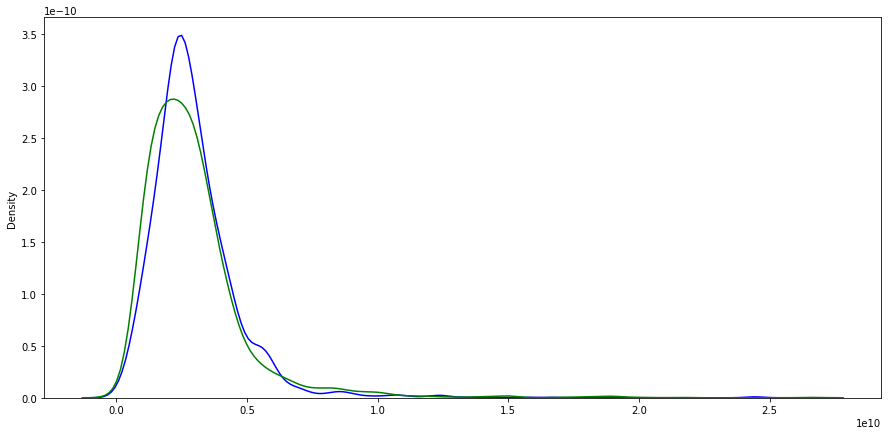

In [29]:
plt.figure(figsize=(15, 7))
sns.distplot(y_pred, kde=True, hist = False, color= 'blue')
sns.distplot(y_test,kde=True, hist = False, color= 'green')
plt.show()